# 5인 이상 고양시 소재 기업 분석

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# change pandas decimal display option 
pd.options.display.float_format = '{:.5f}'.format

In [45]:
# 데이터 불러오기 

data = pd.read_excel('C:\\Users\\고양연구원\\Desktop\\지역경제\\5인 이상 고양시 소재 기업 (공공사업부-2025-DB2049).xlsx')
data

,기업규모,도로명주소,지번주소,업종명11차,업종명11차_대,업종명11차_중,업종명11차_소,업종명11차_세,업종명11차_세세,업종코드11차,...,매출액_2023,자산총계_2024,자산총계_2023,부채총계_2024,부채총계_2023,자본총계_2024,자본총계_2023,손익당기순이익순손실_2024,손익당기순이익순손실_2023,연구개발비_2024
0,중기업,"경기 고양시 일산동구 일산로 142, 7층 718호 (백석동,유니테크벤처타운)",경기 고양시 일산동구 백석동 1141-2번지 유니테크빌벤처타운 7층 718호,그 외 기타 기계 및 장비 도매업,도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,기타 기계 및 장비 도매업,그 외 기타 기계 및 장비 도매업,G46599,...,33805540.00000,34392651.00000,33502801.00000,2703279.00000,2537843.00000,31689372.00000,30964958.00000,4724414.00000,4985942.00000,326016
1,중기업,경기 고양시 일산동구 은마길 189-37 (설문동),경기 고양시 일산동구 설문동 575-4번지,주류 도매업,도매 및 소매업,도매 및 상품 중개업,음ㆍ식료품 및 담배 도매업,음료 및 담배 도매업,주류 도매업,G46331,...,38833498.00000,10066565.00000,10131788.00000,9207840.00000,9159372.00000,858725.00000,972416.00000,42132.00000,99533.00000,0
2,중견기업,"경기 고양시 덕양구 고양시청로 13-4, 501호 (주교동,내외빌딩)",경기 고양시 덕양구 주교동 602-13번지 내외빌딩 501호,기타 토목시설물 건설업,건설업,종합 건설업,토목 건설업,토목시설물 건설업,기타 토목시설물 건설업,F41229,...,157390474.00000,133169527.00000,154337416.00000,113307993.00000,117508821.00000,19861534.00000,36828595.00000,-16908755.00000,-21092576.00000,238843
3,소기업,경기 고양시 덕양구 고양시청로 19 (주교동),경기 고양시 덕양구 주교동 602-11번지,도시계획 및 조경설계 서비스업,"전문, 과학 및 기술 서비스업","건축기술, 엔지니어링 및 기타 과학기술 서비스업","건축기술, 엔지니어링 및 관련 기술 서비스업",건축 및 조경 설계 서비스업,도시계획 및 조경설계 서비스업,M72112,...,2119433.00000,2179816.00000,1528983.00000,1063806.00000,483857.00000,1116010.00000,1045126.00000,70884.00000,25945.00000,165373
4,소기업,"경기 고양시 일산동구 호수로 358-25, 905호 (백석동,동문굿모닝타워2차)",경기 고양시 일산동구 백석동 1324번지 동문굿모닝타워2차 905호,배관 및 냉ㆍ난방 공사업,건설업,전문직별 공사업,건물설비 설치 공사업,건물설비 설치 공사업,배관 및 냉ㆍ난방 공사업,F42201,...,7924281.00000,2476157.00000,2523600.00000,252213.00000,318280.00000,2223944.00000,2205320.00000,18623.00000,323496.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260,NaN,"경기 고양시 일산서구 일산로695번길 6-26, 1층(대화동)",경기 고양시 일산서구 대화동 2138번지 1층,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7261,NaN,"경기 고양시 덕양구 중앙로 560, 2층 211호(행신동,화성프라자)",경기 고양시 덕양구 행신3동 943-2번지 화성프라자 2층 211호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7262,NaN,"경기 고양시 일산서구 송산로 343, 111호(가좌동,송포프라자)",경기 고양시 일산서구 가좌동 772-1번지 송포프라자 111호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7263,NaN,NaN,경기 고양시 일산동구 백석동 1335 백석역 더리브 스타일 313호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [46]:
# list column list of 'data' 

print(data.columns)

Index(['기업규모', '도로명주소', '지번주소', '업종명11차', '업종명11차_대', '업종명11차_중', '업종명11차_소',
       '업종명11차_세', '업종명11차_세세', '업종코드11차', '업종코드11차_대', '업종코드11차_중',
       '업종코드11차_소', '업종코드11차_세', '업종코드11차_세세', '종업원수_전체_2024', '종업원수_전체_2023',
       '매출액_2024', '매출액_2023', '자산총계_2024', '자산총계_2023', '부채총계_2024',
       '부채총계_2023', '자본총계_2024', '자본총계_2023', '손익당기순이익순손실_2024',
       '손익당기순이익순손실_2023', '연구개발비_2024'],
      dtype='object')


In [47]:
# make '시군구' column based on '도로명주소' 
data['시군구'] = data['도로명주소'].str.split().str[2]
# if '시군구' column is empty, fill with '지번주소' column 
data['시군구'] = data['시군구'].fillna(data['지번주소'].str.split().str[2])
print(data['시군구'].head())
print(data['시군구'].isnull().sum())

0    일산동구
1    일산동구
2     덕양구
3     덕양구
4    일산동구
Name: 시군구, dtype: object
0


In [48]:
# list unique values of '기업규모' column 

print(data['기업규모'].unique())
print(data['기업규모'].isnull().sum())

['중기업' '중견기업' '소기업' '소상공인' '판단제외' '한시성중소기업' '보호대상중견기업' nan '대기업']
1130


In [49]:
# filter the dataframe so that there are only rows do not have '소상공인' values in '기업규모' 

data_ns = data[data['기업규모'] != '소상공인']
print(data_ns.head())
print(data_ns.info())
print(data_ns.describe())

   기업규모                                         도로명주소  \
0   중기업   경기 고양시 일산동구 일산로 142, 7층 718호 (백석동,유니테크벤처타운)   
1   중기업                  경기 고양시 일산동구 은마길 189-37 (설문동)   
2  중견기업        경기 고양시 덕양구 고양시청로 13-4, 501호 (주교동,내외빌딩)   
3   소기업                     경기 고양시 덕양구 고양시청로 19 (주교동)   
4   소기업  경기 고양시 일산동구 호수로 358-25, 905호 (백석동,동문굿모닝타워2차)   

                                         지번주소              업종명11차  \
0  경기 고양시 일산동구 백석동 1141-2번지 유니테크빌벤처타운 7층 718호  그 외 기타 기계 및 장비 도매업   
1                     경기 고양시 일산동구 설문동 575-4번지              주류 도매업   
2           경기 고양시 덕양구 주교동 602-13번지 내외빌딩 501호        기타 토목시설물 건설업   
3                     경기 고양시 덕양구 주교동 602-11번지    도시계획 및 조경설계 서비스업   
4       경기 고양시 일산동구 백석동 1324번지 동문굿모닝타워2차 905호       배관 및 냉ㆍ난방 공사업   

           업종명11차_대                    업종명11차_중                  업종명11차_소  \
0          도매 및 소매업                 도매 및 상품 중개업          기계장비 및 관련 물품 도매업   
1          도매 및 소매업                 도매 및 상품 중개업            음ㆍ식료품 및 담배 도매업   
2          

In [50]:
data_sb = data[data['기업규모'] == '소상공인']

# calculate the ratio of '소상공인' in the original data
ratio_sb = len(data_sb) / len(data) * 100
print(f"소상공인 비율: {ratio_sb:.2f}%")


# calculate the ratio of each '기업규모' in the entire data 
ratio_by_size = data['기업규모'].value_counts(normalize=True) * 100
print(ratio_by_size)

소상공인 비율: 14.98%
기업규모
소기업        49.09535
중기업        19.77180
소상공인       17.73431
판단제외       12.82804
중견기업        0.40750
보호대상중견기업    0.11410
한시성중소기업     0.03260
대기업         0.01630
Name: proportion, dtype: float64


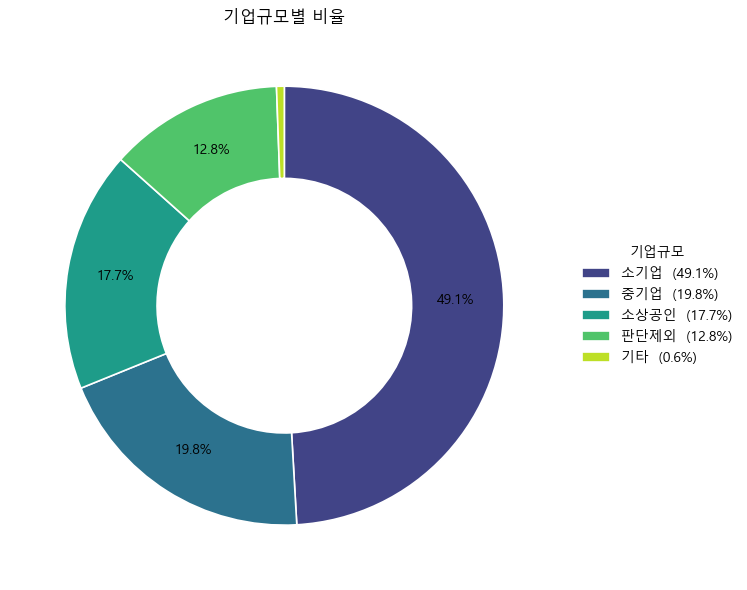

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- Korean font (pick ONE that exists on your machine) ---
# Windows: "Malgun Gothic" / macOS: "AppleGothic" / Linux: "NanumGothic"
mpl.rcParams["font.family"] = "Malgun Gothic"
mpl.rcParams["axes.unicode_minus"] = False

# --- (optional) sort + combine tiny slices into '기타' ---
s = ratio_by_size.sort_values(ascending=False).copy()
p = s / s.sum()
min_share = 0.03  # 3% 미만은 기타로 묶기 (원하면 조절)
if (p < min_share).any():
    etc = s[p < min_share].sum()
    s = s[p >= min_share]
    s.loc["기타"] = etc

values = s.values
labels = s.index
percents = values / values.sum() * 100

# --- only show % text for slices >= threshold ---
def autopct_if_big(threshold=3.0):
    return lambda pct: f"{pct:.1f}%" if pct >= threshold else ""

fig, ax = plt.subplots(figsize=(9, 6))

colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(s)))

wedges, _, autotexts = ax.pie(
    values,
    labels=None,                           # <- labels moved to legend
    startangle=90,
    counterclock=False,
    colors=colors,
    autopct=autopct_if_big(3.0),           # <- hide tiny percents
    pctdistance=0.78,
    wedgeprops=dict(width=0.42, edgecolor="white", linewidth=1.2)  # donut + clean borders
)

# Legend text (Korean labels + percent)
legend_labels = [f"{lab}  ({pct:.1f}%)" for lab, pct in zip(labels, percents)]
ax.legend(
    wedges, legend_labels,
    title="기업규모",
    loc="center left", bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

ax.set_title("기업규모별 비율")
ax.set_aspect("equal")
plt.tight_layout()
plt.show()


### 소상공인과 소기업의 차이

제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다.

1. "소기업"이란 「중소기업기본법」 제2조제2항에 따른 소기업을 말한다.

2. "소상공인"이란 소기업 중 상시 근로자가 10명 미만인 사업자로서 업종별 상시 근로자 수 등이 대통령령으로 정하는 기준에 해당하는 자를 말한다.

[전문개정 2011. 5. 24.]

source : https://casenote.kr/%EB%B2%95%EB%A0%B9/%EC%86%8C%EA%B8%B0%EC%97%85_%EB%B0%8F_%EC%86%8C%EC%83%81%EA%B3%B5%EC%9D%B8_%EC%A7%80%EC%9B%90%EC%9D%84_%EC%9C%84%ED%95%9C_%ED%8A%B9%EB%B3%84%EC%A1%B0%EC%B9%98%EB%B2%95/%EC%A0%9C2%EC%A1%B0

In [51]:
# 소상공인 제외한 데이터의 기술통계량 확인하기 

print(data_ns.describe())

       종업원수_전체_2024  종업원수_전체_2023        매출액_2024        매출액_2023  \
count    6177.00000    3027.00000      2259.00000      2748.00000   
mean       15.87049      18.89428   8124608.07216   7096506.43122   
std        46.47907      71.91310  21557040.24750  18576054.07302   
min         5.00000       0.00000       536.00000       165.00000   
25%         6.00000       6.00000   1558315.00000   1295623.75000   
50%         9.00000      10.00000   3398818.00000   2941636.00000   
75%        15.00000      17.00000   7484152.50000   6602515.00000   
max      2298.00000    2856.00000 521265925.00000 450135831.00000   

             자산총계_2024        자산총계_2023        부채총계_2024        부채총계_2023  \
count       2262.00000       2770.00000       2257.00000       2762.00000   
mean     9213529.11715    7655434.32491    6268945.83163    5068326.51303   
std     63165156.76857   52509580.75150   54111761.10659   43520586.97316   
min         1170.00000        100.00000        307.00000        136.00

In [52]:
data_ns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6177 entries, 0 to 7264
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기업규모             5047 non-null   object 
 1   도로명주소            6000 non-null   object 
 2   지번주소             6177 non-null   object 
 3   업종명11차           5997 non-null   object 
 4   업종명11차_대         5997 non-null   object 
 5   업종명11차_중         5997 non-null   object 
 6   업종명11차_소         5997 non-null   object 
 7   업종명11차_세         5997 non-null   object 
 8   업종명11차_세세        5997 non-null   object 
 9   업종코드11차          5997 non-null   object 
 10  업종코드11차_대        5997 non-null   object 
 11  업종코드11차_중        5997 non-null   object 
 12  업종코드11차_소        5997 non-null   object 
 13  업종코드11차_세        5997 non-null   object 
 14  업종코드11차_세세       5997 non-null   object 
 15  종업원수_전체_2024     6177 non-null   int64  
 16  종업원수_전체_2023     3027 non-null   float64
 17  매출액_2024         22

In [53]:
# delete columns that have object values 
data_ns_no = data_ns.select_dtypes(exclude=['object'])
data_ns_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6177 entries, 0 to 7264
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   종업원수_전체_2024     6177 non-null   int64  
 1   종업원수_전체_2023     3027 non-null   float64
 2   매출액_2024         2259 non-null   float64
 3   매출액_2023         2748 non-null   float64
 4   자산총계_2024        2262 non-null   float64
 5   자산총계_2023        2770 non-null   float64
 6   부채총계_2024        2257 non-null   float64
 7   부채총계_2023        2762 non-null   float64
 8   자본총계_2024        2261 non-null   float64
 9   자본총계_2023        2764 non-null   float64
 10  손익당기순이익순손실_2024  2261 non-null   float64
 11  손익당기순이익순손실_2023  2769 non-null   float64
 12  연구개발비_2024       6177 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 675.6 KB


In [54]:
# 소상공인 제외한 데이터에 대한 기술통계량 확인 

from skimpy import skim 

skim(data_ns_no)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6177   │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA   ┃ NA %     ┃ mean    ┃ sd      ┃ p0       ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ 종업원수 │    0 │        0 │   15.87 │   46.48 │        5 │       6 │       9 │      15 │    2298 │   ▇    │  │
│ │ _전체_20 │      │          │         │         │          │         │         │         │         │        │  │
│ │ 24       │      │          │         │         │          │         │         │         │         │        │  │
│ │ 종업원수 │ 3150 │ 50.99562 │   18.89 │   71.91 │        0 │       6 │      10 │      17 │    2856 │   ▇    │  │
│ │ _전체_20 │      │ 89460903 │         │         │          │         │         │         │         │        │  │
│ │ 23       │      │       35 │         │         │          │         │         │         │         │        │  │
│ │ 매출액_2 │ 3918 │ 63.42884 │ 8125000 │ 2156000 │      536 │ 1558000 │ 3399000 │ 7484000 │ 5213000 │   ▇    │  │
│ │ 024      │      │ 89558037 │         │       0 │          │         │         │         │      00 │        │  │
│ │          │      │        9 │         │         │          │         │         │         │         │        │  │
│ │ 매출액_2 │ 3429 │ 55.51238 │ 7097000 │ 1858000 │      165 │ 1296000 │ 2942000 │ 6603000 │ 4501000 │   ▇    │  │
│ │ 023      │      │ 46527440 │         │       0 │          │         │         │         │      00 │        │  │
│ │          │      │        5 │         │         │          │         │         │         │         │        │  │
│ │ 자산총계 │ 3915 │ 63.38028 │ 9214000 │ 6317000 │     1170 │  959300 │ 2460000 │ 5722000 │ 1968000 │   ▇    │  │
│ │ _2024    │      │ 16901408 │         │       0 │          │         │         │         │     000 │        │  │
│ │          │      │        5 │         │         │          │         │         │         │         │        │  │
│ │ 자산총계 │ 3407 │ 55.15622 │ 7655000 │ 5251000 │      100 │  713900 │ 1925000 │ 4707000 │ 1446000 │   ▇    │  │
│ │ _2023    │      │ 47045491 │         │       0 │          │         │         │         │     000 │        │  │
│ │          │      │        3 │         │         │          │         │         │         │         │        │  │
│ │ 부채총계 │ 3920 │ 63.46122 │ 6269000 │ 5411000 │      307 │  420100 │ 1144000 │ 3170000 │ 1716000 │   ▇    │  │
│ │ _2024    │      │ 71329124 │         │       0 │          │         │         │         │     000 │        │  │
│ │          │      │        2 │         │         │          │         │         │         │         │        │  │
│ │ 부채총계 │ 3415 │ 55.28573 │ 5068000 │ 4352000 │      136 │  298800 │  899000 │ 2478000 │ 1327000 │   ▇    │  │
│ │ _2023    │      │ 74129836 │         │       0 │          │         │         │       

In [55]:
from summarytools import dfSummary 

dfSummary(data_ns_no)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,종업원수_전체_2024[int64],Mean (sd) : 15.9 (46.5)min < med < max:5.0 < 9.0 < 2298.0IQR (CV) : 9.0 (0.3),149 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjcsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvTLEjVAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAV9JREFUeJzt10Fq20AYgFFNCSHd2ASDD+ND9LA9hG9jirxo0oJR0QFKHYXQfvS9rWZ+ZvExksayLBP86z797QPAPR7+tGCM8Xmapsdpm5/Lsrxs3Av3hbpGejgcvux2u+dpg+v1+m2M8VWsfPSN+rhGejqdXvb7/etbBs/z/HQ+n58vl8t6G7tV+dhX/2qN9Hg8ft8wf/1sgHfzM0WCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGS8HDPonmen946eN1zu93W+bsxxqbD8V/5sSzL6++e/gJ79y3yPxwZbwAAAABJRU5ErkJggg=="">",0(0.0%)
2,종업원수_전체_2023[float64],Mean (sd) : 18.9 (71.9)min < med < max:0.0 < 10.0 < 2856.0IQR (CV) : 11.0 (0.3),133 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjcsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvTLEjVAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAV9JREFUeJzt10Fq20AYgFFNCSHd2ASDD+ND9LA9hG9jirxo0oJR0QFKHYXQfvS9rWZ+ZvExksayLBP86z797QPAPR7+tGCM8Xmapsdpm5/Lsrxs3Av3hbpGejgcvux2u+dpg+v1+m2M8VWsfPSN+rhGejqdXvb7/etbBs/z/HQ+n58vl8t6G7tV+dhX/2qN9Hg8ft8wf/1sgHfzM0WCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGSIFQShEqCUEkQKglCJUGoJAiVBKGS8HDPonmen946eN1zu93W+bsxxqbD8V/5sSzL6++e/gJ79y3yPxwZbwAAAABJRU5ErkJggg=="">","3,150(51.0%)"
3,매출액_2024[float64],Mean (sd) : 8124608.1 (21557040.2)min < med < max:536.0 < 3398818.0 < 521265925.0IQR (CV) : 5925837.5 (0.4),"2,258 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjcsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvTLEjVAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAYZJREFUeJzt10FKAzEYhuHEqujCFil02SN4gB7Cw7p137N0U+wUsWopkTmAqKNFP3me9eQnMC/JTG2tFfjrTn57A/AZpx89UGu9LKWcl2FeW2u7gWvhc6H2kU6n09vxeHxdBthutw+11juxcuwT9byPdLFY7CaTyfNXBnddd7FcLq/X63V/GjtVOe7V3+sjnc1mTwPm958N8G1+poggVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCKcHnP44XA4K6WMa61DR7y21nY/uyv+bahd1118dfBqtbra7/c38/l8NBqNnodsbrPZPNZa70spg9ZTkry01t59z2/xYDzE1Xz9WQAAAABJRU5ErkJggg=="">","3,918(63.4%)"
4,매출액_2023[float64],Mean (sd) : 7096506.4 (18576054.1)min < med < max:165.0 < 2941636.0 < 450135831.0IQR (CV) : 5306891.2 (0.4),"2,748 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjcsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvTLEjVAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAYZJREFUeJzt10FKAzEYhuHEqujCFil02SN4gB7Cw7p137N0U+wUsWopkTmAqKNFP3me9eQnMC/JTG2tFfjrTn57A/AZpx89UGu9LKWcl2FeW2u7gWvhc6H2kU6n09vxeHxdBthutw+11juxcuwT9byPdLFY7CaTyfNXBnddd7FcLq/X63V/GjtVOe7V3+sjnc1mTwPm958N8G1+poggVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCKcHnP44XA4K6WMa61DR7y21nY/uyv+bahd1118dfBqtbra7/c38/l8NBqNnodsbrPZPNZa70spg9ZTkry01t59z2/xYDzE1Xz9WQAAAABJRU5ErkJggg=="">","3,429(55.5%)"
5,자산총계_2024[float64],Mean (sd) : 9213529.1 (63165156.8)min < med < max:1170.0 < 2460211.0 < 1967561552.0IQR (CV) : 4762347.5 (0.1),"2,261 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjcsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvTLEjVAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAV9JREFUeJzt10Fq20AYgFFNCSHd2ASDD

# 산업분류별(대) 기술통계량

In [60]:
# number of unique values in '업종명11차'

print(data_ns['업종명11차'].nunique())
print(data_ns['업종명11차_대'].nunique())

652
19


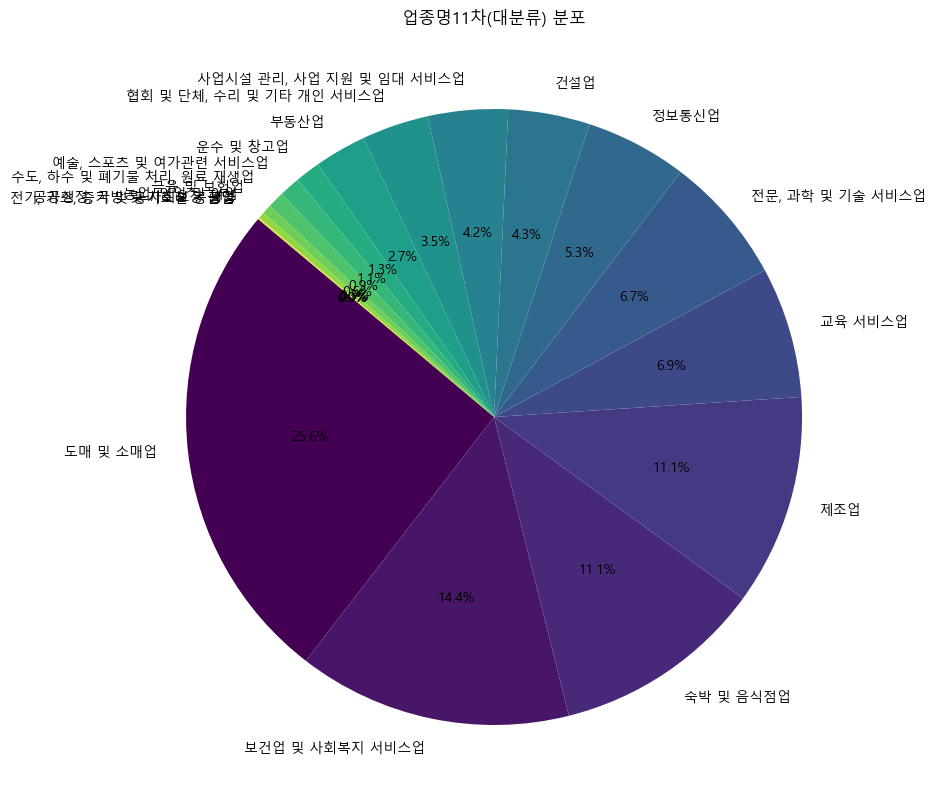

In [64]:
# make a donut chart with '업종명11차_대' 
# make an etc label for minor categories 

plt.figure(figsize=(10,10))
data_ns['업종명11차_대'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('업종명11차(대분류) 분포')
plt.ylabel('')
plt.show()